# **Customer Segmentation Using KMeans Clustering And KNN**
    Used to Group people based on shopping style (RFM), then for a person, find others with similar products within their group, and recommend the items they’re missing.

### **ML Concepts Involved:**
- **Unsupervised learning** - KMeans for clustering
- **KNN (similarity search)** - within-cluster personalized recommendation
- **RFM Analysis** - standard customer behavior model in e-commerce/CRM
- **Collaborative Filtering logic**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Dataset/data.csv" , encoding='ISO-8859-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.shape

(541909, 8)

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Data Cleaning

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [13]:
df.shape

(397884, 8)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

<Axes: ylabel='Country'>

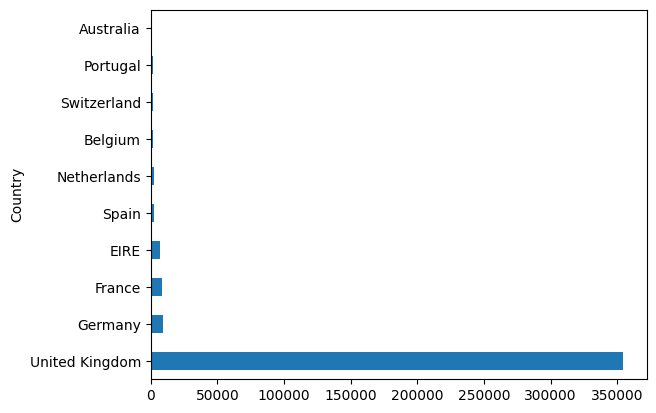

In [16]:
df['Country'].value_counts().head(10).plot(kind='barh')

In [17]:
df['CustomerID'].nunique()

4338

In [18]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
JUMBO BAG RED RETROSPOT                46181
WHITE HANGING HEART T-LIGHT HOLDER     36725
                                       ...  
BLACK VINT ART DEC CRYSTAL BRACELET        1
FLOWER SHOP DESIGN MUG                     1
SET 36 COLOURING PENCILS DOILEY            1
HEN HOUSE W CHICK IN NEST                  1
AMBER BERTIE GLASS BEAD BAG CHARM          1
Name: Quantity, Length: 3877, dtype: int64

In [19]:
df = df.reset_index(drop = True)

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<Axes: >

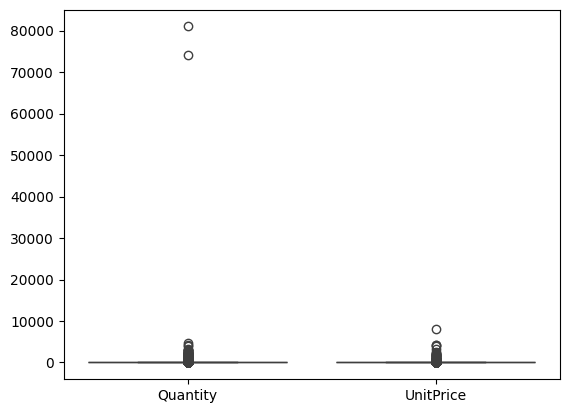

In [21]:
sns.boxplot(data = df[['Quantity', 'UnitPrice']])

### Handling outliers:
- Using **quantiles** to cap extreme values in Quantity and UnitPrice.

In [22]:
q1 = df['Quantity'].quantile(0.1)
q99 = df['Quantity'].quantile(0.99)
df = df[(df['Quantity'] >= q1) & (df['Quantity'] <= q99)]

In [23]:
q1 = df['UnitPrice'].quantile(0.1)
q99 = df['UnitPrice'].quantile(0.99)
df = df[(df['UnitPrice'] >= q1) & (df['UnitPrice'] <= q99)]

In [24]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [25]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [26]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x : (snapshot_date - x.max()).days,
    'InvoiceNo' : 'nunique',
    'TotalPrice' : 'sum'
}).reset_index()

In [27]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [28]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,7,4004.96
1,12348.0,75,4,964.20
2,12349.0,19,1,1332.80
3,12350.0,310,1,294.40
4,12352.0,36,7,1385.74
...,...,...,...,...
4283,18280.0,278,1,180.60
4284,18281.0,181,1,31.80
4285,18282.0,8,2,159.09
4286,18283.0,4,16,2031.83


In [29]:
scaled_rfm = MinMaxScaler().fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [30]:
scaled_rfm = pd.DataFrame(scaled_rfm, index=rfm.index, columns = ['Recency', 'Frequency', 'Monetary'])

In [31]:
scaled_rfm

,Recency,Frequency,Monetary
0,0.002681,0.030457,0.025927
1,0.198391,0.015228,0.006228
2,0.048257,0.000000,0.008616
3,0.828418,0.000000,0.001888
4,0.093834,0.030457,0.008959
...,...,...,...
4283,0.742627,0.000000,0.001151
4284,0.482574,0.000000,0.000187
4285,0.018767,0.005076,0.001012
4286,0.008043,0.076142,0.013144


In [32]:
kmeans = KMeans(n_clusters = 4, random_state = 42)

In [33]:
scaled_rfm['Cluster'] = kmeans.fit_predict(scaled_rfm)

In [34]:
scaled_rfm

,Recency,Frequency,Monetary,Cluster
0,0.002681,0.030457,0.025927,0
1,0.198391,0.015228,0.006228,3
2,0.048257,0.000000,0.008616,0
3,0.828418,0.000000,0.001888,1
4,0.093834,0.030457,0.008959,0
...,...,...,...,...
4283,0.742627,0.000000,0.001151,1
4284,0.482574,0.000000,0.000187,2
4285,0.018767,0.005076,0.001012,0
4286,0.008043,0.076142,0.013144,0


In [35]:
rfm['Cluster'] = kmeans.fit_predict(scaled_rfm)

In [36]:
cust_prod = df.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().fillna(0)

In [37]:
cust_prod

StockCode,10002,10080,10123C,10125,10133,10135,11001,15036,15039,15044A,...,90214M,90214N,90214P,90214R,90214S,90214V,90214Y,DOT,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
print("Total non-zero cells:", (cust_prod > 0).sum().sum())

Total non-zero cells: 234693


In [39]:
def recommend_product(customer_id, n_neighbours = 3):
    cluster_id = rfm[rfm['CustomerID'] == customer_id]['Cluster'].values[0]
    cluster_customer = rfm[rfm['Cluster'] == cluster_id]['CustomerID']
    
    cluster_matrix = cust_prod.loc[cust_prod.index.isin(cluster_customer)]
    sparse_matrix = csr_matrix(cluster_matrix.values)
    
    knn = NearestNeighbors(metric = 'cosine')
    knn.fit(sparse_matrix)
    
    cust_index = list(cluster_matrix.index).index(customer_id)
    distances, indices = knn.kneighbors(sparse_matrix[cust_index], n_neighbors=n_neighbours+1)
    
    neighbours = [cluster_matrix.index[i] for i in indices.flatten() if cluster_matrix.index[i] != customer_id]
    original_products = set(df[df['CustomerID'] ==customer_id]['StockCode'])
    recommend = set()
    
    for neighbour in neighbours:
        neighbour_products = set(df[df['CustomerID'] == neighbour]['StockCode'])
        recommend.update(neighbour_products - original_products)

    return recommend
    

In [40]:
customer_id = 18280
recommendations = recommend_product(customer_id)
print(f"Recommend Products for Customer {customer_id}: {recommendations}")

Recommend Products for Customer 18280: {'21586', '22507', '22424', '21621', '22357', '21626', '21623', '84997D', '22692', '21622', '48184', '22910', '84997A', '21878', '84997C', '84997B', '48188', '21524', '22993', '48138', '22086', '22795', '48129', '48185'}
